In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
from scipy.signal import butter,filtfilt,welch

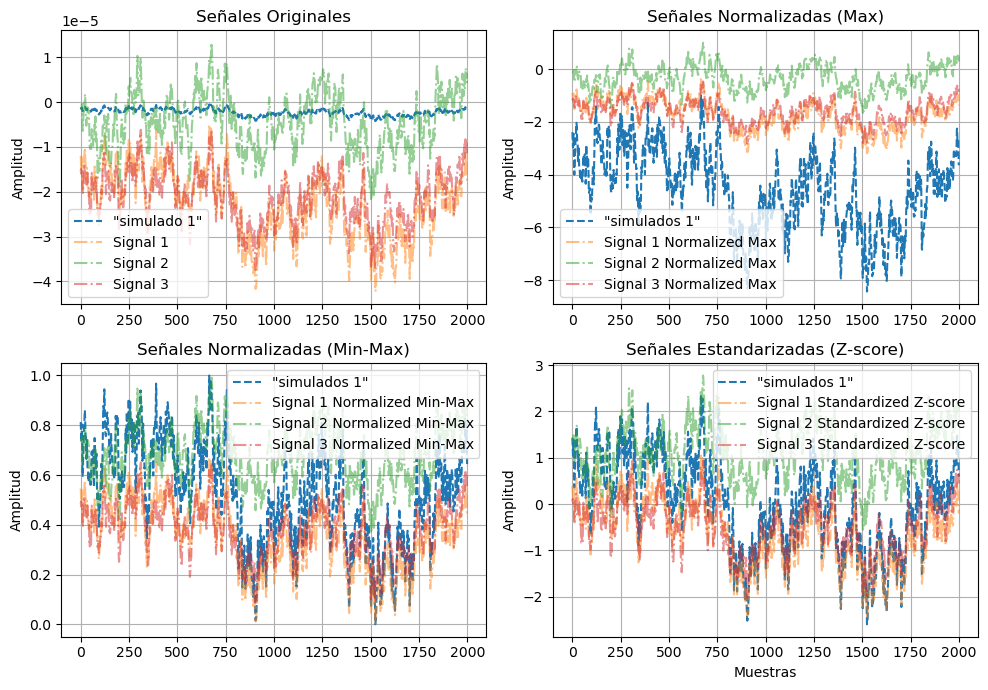

In [8]:
def read_signals(file_path):
    return np.loadtxt(file_path)

def normalize_max(signal,global_max):
    return signal /abs(global_max)

def normalize_min_max(signal, global_min, global_max):
    return (signal - global_min) / (global_max - global_min)

def standardize_z_score(signal, global_mean, global_std):
    return (signal - global_mean) / global_std

# Función para graficar señales
def plot_signal(ax, signal_data, label):
    ax.plot(signal_data, label=label,alpha=0.5,linestyle="-.")

# Leer las señales de archivos de texto
signal1 = read_signals('P3_MNE.txt')*1e-1
signal2 = read_signals('P3_MNE.txt')
signal3 = read_signals('P4_MNE.txt')
signal4 = read_signals('Pz_MNE.txt')

all_signals = [signal2,signal3,signal4]
all_signals_simulados = [signal1]


all_values = np.concatenate(all_signals)  # Combinar todos los datos
global_min = np.min(all_values)
global_max = np.max(all_values)
global_mean = np.mean(all_values)
global_std = np.std(all_values)

all_values_S = np.concatenate(all_signals_simulados)  # Combinar todos los datos
global_min_S = np.min(all_signals_simulados)
global_max_S = np.max(all_signals_simulados)
global_mean_S = np.mean(all_signals_simulados)
global_std_S = np.std(all_signals_simulados)


normalized_signals_max = [normalize_max(signal,global_max) for signal in all_signals]
normalized_signals_min_max = [normalize_min_max(signal, global_min, global_max) for signal in all_signals]
standardized_signals_z_score = [standardize_z_score(signal, global_mean, global_std) for signal in all_signals]

normalized_signals_max_S = [normalize_max(signal,global_max_S) for signal in all_signals_simulados]
normalized_signals_min_max_S = [normalize_min_max(signal, global_min_S, global_max_S) for signal in all_signals_simulados]
standardized_signals_z_score_S = [standardize_z_score(signal, global_mean_S, global_std_S) for signal in all_signals_simulados]


# Crear un gráfico con múltiples ejes
fig, axs = plt.subplots(2, 2, figsize=(10, 7))  # Cambiar a 2x2

# Graficar señales originales
axs[0, 0].set_title('Señales Originales')
axs[0,0].plot(all_signals_simulados[0],label='"simulado 1"',linestyle="--")
for i, signal in enumerate(all_signals):
    plot_signal(axs[0, 0], signal, f'Signal {i + 1}')
    axs[0, 0].set_ylabel('Amplitud')
    axs[0, 0].grid()
    axs[0, 0].legend()

    # Graficar señales normalizadas (Max)
axs[0, 1].set_title('Señales Normalizadas (Max)')
axs[0,1].plot(normalized_signals_max_S[0],label='"simulados 1"',linestyle="--")
for i, signal in enumerate(normalized_signals_max):
    plot_signal(axs[0, 1], signal, f'Signal {i + 1} Normalized Max')
    axs[0, 1].set_ylabel('Amplitud')
    axs[0, 1].grid()
    axs[0, 1].legend()

# Graficar señales normalizadas (Min-Max)
axs[1, 0].set_title('Señales Normalizadas (Min-Max)')
axs[1,0].plot(normalized_signals_min_max_S[0],label='"simulados 1"',linestyle="--")
for i, signal in enumerate(normalized_signals_min_max):
    plot_signal(axs[1, 0], signal, f'Signal {i + 1} Normalized Min-Max')
    axs[1, 0].set_ylabel('Amplitud')
    axs[1, 0].grid()
    axs[1, 0].legend()

    # Graficar señales estandarizadas (Z-score)
axs[1, 1].set_title('Señales Estandarizadas (Z-score)')
axs[1,1].plot(standardized_signals_z_score_S[0],label='"simulados 1"',linestyle="--")
for i, signal in enumerate(standardized_signals_z_score):
    plot_signal(axs[1, 1], signal, f'Signal {i + 1} Standardized Z-score')
    axs[1, 1].set_ylabel('Amplitud')
    axs[1, 1].grid()
    axs[1, 1].legend()

# Configurar el gráfico
plt.xlabel('Muestras')
plt.tight_layout()  # Ajusta el espacio entre subgráficas
plt.show()



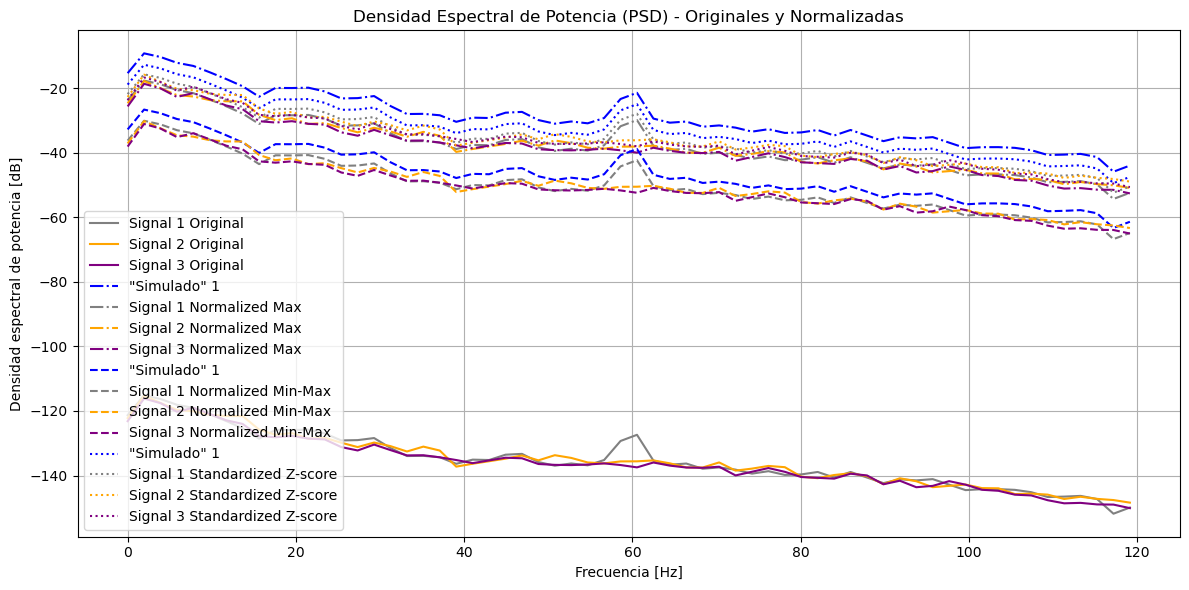

In [10]:
# Función para calcular y graficar la PSD
def plot_psd(signal_data, fs, label, color, linestyle="-"):
    frequencies, psd = welch(signal_data, fs=fs, nperseg=256, noverlap=128)
    idx = frequencies <= 120  # Solo mostrar frecuencias hasta 40 Hz
    plt.plot(frequencies[idx], 10 * np.log10(abs(psd[idx])), linestyle, label=label, color=color)

# Graficar la Transformada de Fourier para señales normalizadas y originales

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
# plot_psd(all_signals_simulados[0], 500, '"Simulado" 1 ', 'blue', '-')

colores=["grey","orange","purple"]
# Graficar PSD de señales originales
for i, signala in enumerate(all_signals):
    plot_psd(signala, 500, f'Signal {i + 1} Original',colores[i], '-')

# Graficar PSD de señales normalizadas (Max)
plot_psd(normalized_signals_max_S[0], 500, '"Simulado" 1 ', 'blue', '-.')
for i, signal in enumerate(normalized_signals_max):
    plot_psd(signal, 500, f'Signal {i + 1} Normalized Max', colores[i],'-.')

# Graficar PSD de señales normalizadas (Min-Max)
plot_psd(normalized_signals_min_max_S[0], 500, '"Simulado" 1 ', 'blue', '--')

for i, signal in enumerate(normalized_signals_min_max):
    plot_psd(signal, 500, f'Signal {i + 1} Normalized Min-Max', colores[i], '--')

# Graficar PSD de señales estandarizadas (Z-score)
plot_psd(standardized_signals_z_score_S[0], 500, '"Simulado" 1 ', 'blue', ':')
for i, signal in enumerate(standardized_signals_z_score):
    plot_psd(signal, 500, f'Signal {i + 1} Standardized Z-score', colores[i], ':')

# Configurar el gráfico
plt.title('Densidad Espectral de Potencia (PSD) - Originales y Normalizadas')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [dB]')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

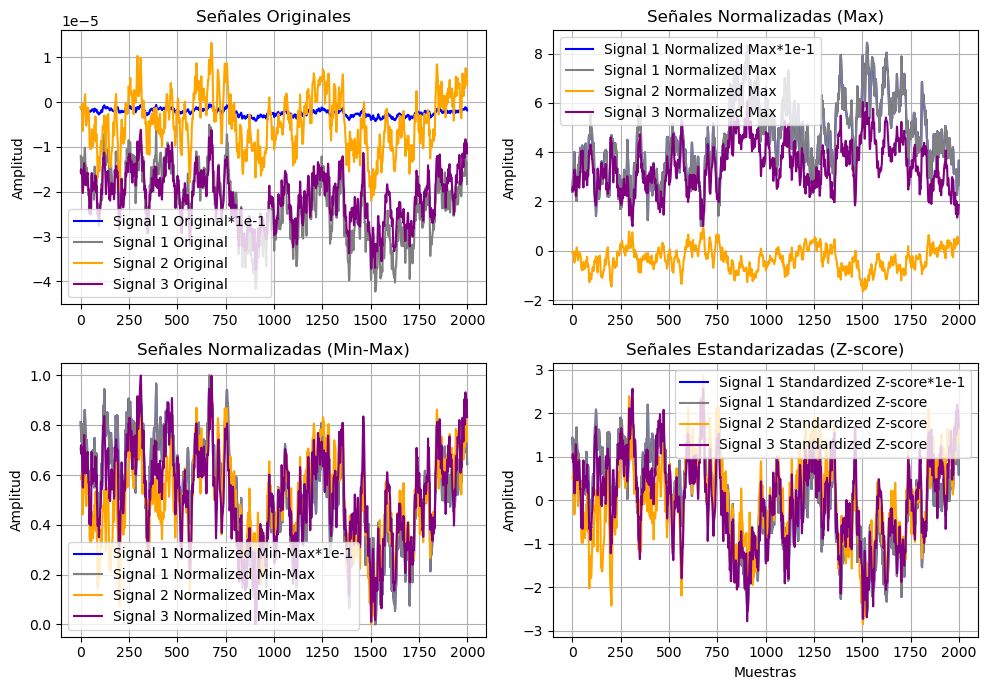

In [37]:
# Función para leer datos de archivos de texto
def read_signals(file_path):
    return np.loadtxt(file_path)

def normalize_max(signal):
    return signal / np.max(signal)

def normalize_min_max(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

# Función de estandarización Z-score
def standardize_z_score(signal):
    return (signal - np.mean(signal)) / np.std(signal)

# Función para graficar señales
def plot_signal(ax, signal_data, label, color):
    ax.plot(signal_data, label=label, color=color)

# Parámetros
fs = 500  # Frecuencia de muestreo (ajusta según sea necesario)

# Leer las señales de archivos de texto
signal1 = read_signals('P3_MNE.txt')*1e-1
signal2 = read_signals('P3_MNE.txt')
signal3 = read_signals('P4_MNE.txt')
signal4 = read_signals('Pz_MNE.txt')

# Normalizar las señales
signal1_max = normalize_max(signal1)
signal2_max = normalize_max(signal2)
signal3_max = normalize_max(signal3)
signal4_max = normalize_max(signal4)

signal1_min_max = normalize_min_max(signal1)
signal2_min_max = normalize_min_max(signal2)
signal3_min_max = normalize_min_max(signal3)
signal4_min_max = normalize_min_max(signal4)


signal1_z_score = standardize_z_score(signal1)
signal2_z_score = standardize_z_score(signal2)
signal3_z_score = standardize_z_score(signal3)
signal4_z_score = standardize_z_score(signal4)


# Crear un gráfico con múltiples ejes
fig, axs = plt.subplots(2, 2, figsize=(10, 7))  # Cambiar a 2x2

# Graficar señales originales
axs[0, 0].set_title('Señales Originales')
plot_signal(axs[0, 0], signal1, 'Signal 1 Original*1e-1', 'blue')
plot_signal(axs[0, 0], signal2, 'Signal 1 Original', 'grey')
plot_signal(axs[0, 0], signal3, 'Signal 2 Original', 'orange')
plot_signal(axs[0, 0], signal4, 'Signal 3 Original', 'purple')
axs[0, 0].set_ylabel('Amplitud')
axs[0, 0].grid()
axs[0, 0].legend()

# Graficar señales normalizadas (Max)
axs[0, 1].set_title('Señales Normalizadas (Max)')
plot_signal(axs[0, 1], signal1_max, 'Signal 1 Normalized Max*1e-1', 'blue')
plot_signal(axs[0, 1], signal2_max, 'Signal 1 Normalized Max', 'grey')
plot_signal(axs[0, 1], signal3_max, 'Signal 2 Normalized Max', 'orange')
plot_signal(axs[0, 1], signal4_max, 'Signal 3 Normalized Max', 'purple')
axs[0, 1].set_ylabel('Amplitud')
axs[0, 1].grid()
axs[0, 1].legend()


# Graficar señales normalizadas (Min-Max)
axs[1, 0].set_title('Señales Normalizadas (Min-Max)')
plot_signal(axs[1, 0], signal1_min_max, 'Signal 1 Normalized Min-Max*1e-1', 'blue')
plot_signal(axs[1, 0], signal2_min_max, 'Signal 1 Normalized Min-Max', 'grey')
plot_signal(axs[1, 0], signal3_min_max, 'Signal 2 Normalized Min-Max', 'orange')
plot_signal(axs[1, 0], signal4_min_max, 'Signal 3 Normalized Min-Max', 'purple')
axs[1, 0].set_ylabel('Amplitud')
axs[1, 0].grid()
axs[1, 0].legend()

# Graficar señales estandarizadas (Z-score)
axs[1, 1].set_title('Señales Estandarizadas (Z-score)')
plot_signal(axs[1, 1], signal1_z_score, 'Signal 1 Standardized Z-score*1e-1', 'blue')
plot_signal(axs[1, 1], signal2_z_score, 'Signal 1 Standardized Z-score', 'grey')
plot_signal(axs[1, 1], signal3_z_score, 'Signal 2 Standardized Z-score', 'orange')
plot_signal(axs[1, 1], signal4_z_score, 'Signal 3 Standardized Z-score', 'purple')
axs[1, 1].set_ylabel('Amplitud')
axs[1, 1].grid()
axs[1, 1].legend()

# Configurar el gráfico
plt.xlabel('Muestras')
plt.tight_layout()  # Ajusta el espacio entre subgráficas
plt.show()


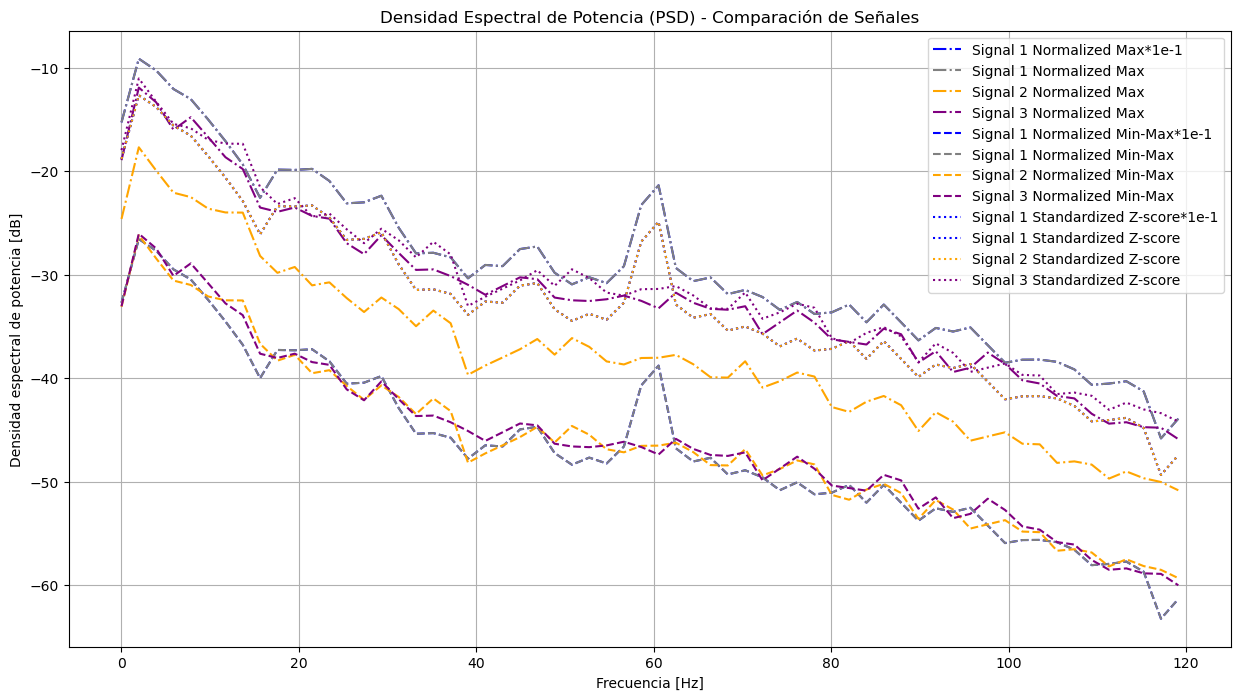

In [62]:
def read_signals(file_path):
    return np.loadtxt(file_path)

def normalize_max(signal):
    return signal / np.max(signal)

def normalize_min_max(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

# Función de estandarización Z-score
def standardize_z_score(signal):
    return (signal - np.mean(signal)) / np.std(signal)

# Función para calcular y graficar la PSD
def plot_psd(signal_data, fs, label, color, linestyle="-."):
    frequencies, psd = welch(signal_data, fs=fs, nperseg=256, noverlap=128)
    idx = frequencies <= 120
    plt.plot(frequencies[idx], 10 * np.log10(abs(psd[idx])), linestyle, label=label, color=color)

# Parámetros
fs = 500  # Frecuencia de muestreo (ajusta según sea necesario)

# Graficar PSD de las señales originales
plt.figure(figsize=(15, 8))
# plot_psd(signal1, fs, 'Signal 1 Original*1e-1', 'blue')
# plot_psd(signal2, fs, 'Signal 1 Original', 'grey')
# plot_psd(signal3, fs, 'Signal 2 Original', 'orange')
# plot_psd(signal4, fs, 'Signal 3 Original', 'purple')



# Graficar PSD de las señales normalizadas (Max)
plot_psd(signal1_max, fs, 'Signal 1 Normalized Max*1e-1', "blue")
plot_psd(signal2_max, fs, 'Signal 1 Normalized Max', "grey")
plot_psd(signal3_max, fs, 'Signal 2 Normalized Max', "orange")
plot_psd(signal4_max, fs, 'Signal 3 Normalized Max', "purple")

# Graficar PSD de las señales normalizadas (Min-Max)
plot_psd(signal1_min_max, fs, 'Signal 1 Normalized Min-Max*1e-1', 'blue', "--")
plot_psd(signal2_min_max, fs, 'Signal 1 Normalized Min-Max', 'grey', "--")
plot_psd(signal3_min_max, fs, 'Signal 2 Normalized Min-Max', 'orange', "--")
plot_psd(signal4_min_max, fs, 'Signal 3 Normalized Min-Max', 'purple', "--")

# Graficar PSD de las señales estandarizadas (Z-score)
plot_psd(signal1_z_score, fs, 'Signal 1 Standardized Z-score*1e-1', 'blue', ":")
plot_psd(signal2_z_score, fs, 'Signal 1 Standardized Z-score', 'blue', ":")
plot_psd(signal2_z_score, fs, 'Signal 2 Standardized Z-score', 'orange', ":")
plot_psd(signal3_z_score, fs, 'Signal 3 Standardized Z-score', 'purple', ":")

# Configurar el gráfico
plt.title('Densidad Espectral de Potencia (PSD) - Comparación de Señales')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [dB]')
plt.legend()
plt.grid()
plt.show()


# Comparación de datos


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import seaborn as sns
from scipy.signal import butter,filtfilt,welch
from scipy import signal
import optuna
import numpy as np  
import optuna.visualization as vis
from optuna.pruners import MedianPruner

import plotly
low_cutoff = 0.01  # Low cut-off frequency (Hz)
high_cutoff = 70.0  # High cut-off frequency (Hz)
order = 4  # Order of the filter
sampling_rate_equipo= 500 
b, a = signal.butter(order, [low_cutoff / (0.5 * sampling_rate_equipo), high_cutoff / (0.5 * sampling_rate_equipo)], btype='band')

/usr/lib/python3/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def Datos_reales(nombres):
    Datos = np.empty(len(nombres), dtype=object)
    Butter = np.empty(len(nombres), dtype=object)
    welch_datos = np.empty(len(nombres), dtype=object)
    Frequencies = np.empty(len(nombres), dtype=object)
    Delta = np.empty(len(nombres), dtype=object)
    Theta = np.empty(len(nombres), dtype=object)
    Alpha = np.empty(len(nombres), dtype=object)
    Beta = np.empty(len(nombres), dtype=object)
    Nombres=np.empty(len(nombres), dtype="U100")

    # Inicialización de arrays para promedios de bandas
    main_Delta = np.zeros(2)
    main_Theta = np.zeros(2)
    main_Alpha = np.zeros(2)
    main_Beta = np.zeros(2)
    for i, nombre in enumerate(nombres):  
        Nombres[i]=nombre 



        data = np.loadtxt(nombre)
        
        #data=data/np.max(data)
        data=(data-np.mean(data)) /np.std(data)
        Datos[i]=data
        Butter[i]=butter= signal.filtfilt(b, a,data)

        frequencies, psd = signal.welch(butter, fs, nperseg=nperseg, noverlap=noverlap)
        Frequencies[i]=frequencies=np.array(frequencies)

        welch_data = np.array([10 * np.log10(psd[i]) for i in range(len(frequencies))])
        welch_datos[i]=welch_data

        delta = welch_data[np.logical_and(frequencies >= 1, frequencies <= 3)]
        theta = welch_data[np.logical_and(frequencies >= 4, frequencies <= 7)]
        alpha = welch_data[np.logical_and(frequencies >= 7, frequencies <= 13)]
        beta = welch_data[np.logical_and(frequencies >= 14, frequencies <= 30)]

        Delta[i]=[delta.mean(),delta.std()]
        Theta[i]=[theta.mean(),theta.std()]
        Alpha[i]=[alpha.mean(),alpha.std()]
        Beta[i]=[beta.mean(),beta.std()]

        main_Delta += np.array([delta.mean(), delta.std()]) / len(nombres)
        main_Theta += np.array([theta.mean(), theta.std()]) / len(nombres)
        main_Alpha += np.array([alpha.mean(), alpha.std()]) / len(nombres)
        main_Beta += np.array([beta.mean(), beta.std()]) / len(nombres)

    return {
        "Nombres":Nombres,
        'datos': Datos, "frequencies": Frequencies,  "welch_data":welch_datos,
        'delta':Delta,'theta':Theta,'alpha':Alpha,'beta':Beta,
        'main_Delta': main_Delta,'main_Theta':main_Theta,"main_Alpha":main_Alpha,"main_Beta":main_Beta
    }


In [5]:

fs = 500  # Sampling rate
nperseg = 256  # Segment length
noverlap = 128 # Overlap between segments
sampling_rate = 2000 ### simulacion 

resultado_compilacion = subprocess.run("g++ -fopenmp -O3 main.cpp Matrix_conect.cpp -o main_multi", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
if resultado_compilacion.returncode != 0:
    print("Error durante la compilación:")
    print(resultado_compilacion.stderr)

def Simulado_EGG(params):
    L, P, inhibidoras, trest, trelative, alpha, tmax, type_matrix = params
        
    # Ejecución del programa
    resultado_ejecucion = subprocess.run(f"./main_multi {L} {P} {inhibidoras} {trest} {trelative} {alpha} {tmax} {type_matrix}", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    if resultado_ejecucion.returncode != 0:
        print("Error durante la ejecución:")
        print(resultado_ejecucion.stderr)
        return None
    
    # Procesamiento de los datos
    lines = resultado_ejecucion.stdout.strip().split('\n')
    data_list = [[float(num) for num in line.split()] for line in lines]
    data = np.array(data_list)[30:,1]

    
    #data=(data-np.mean(data)) /np.std(data)
    data=data/np.max(data) 
    n_samples_resampled = int(len(data) * (fs/sampling_rate))
    data_resampled = signal.resample(data, n_samples_resampled)

    butter = signal.filtfilt(b, a,data_resampled)

    frequencies, psd = signal.welch(butter, fs, nperseg=nperseg, noverlap=noverlap)
    frequencies=np.array(frequencies)


    welch_data = np.array([10 * np.log10(psd[i]) for i in range(len(frequencies))])
    
    delta = welch_data[np.logical_and(frequencies >= 0, frequencies <= 3)]
    theta = welch_data[np.logical_and(frequencies >= 3, frequencies <= 7)]
    alpha = welch_data[np.logical_and(frequencies >= 7, frequencies <= 14)]
    beta = welch_data[np.logical_and(frequencies >= 14, frequencies <= 30)]

    return {
        'data': data,"data_resample":data_resampled,"butter": butter,
        "frequencies": frequencies,"welch_data":welch_data,
        'delta':[delta.mean(),delta.std()],
        'theta':[theta.mean(), theta.std()],
        'alpha':[ alpha.mean(),alpha.std()],
        'beta': [beta.mean(), beta.std()]
    }



In [6]:
Params1={'L': 29, 'P': 0.3495855264639949, 'Inh': 0.4374925488997701, 'Trest': -5.413378622682971, 'Trelative': 4.30925916893512, 'C_h': 26.897198730686277, 'Tipo_red': 2}
Params2={'L': 23, 'P': 0.660500086275713, 'Inh': 0.405158763656728, 'Trest': -3.671349112221547, 'Trelative': 4.006004660878625, 'C_h': 30.21558499348253, 'Tipo_red': 2}
Params3={'L': 25, 'P': 0.4148189955111966, 'Inh': 0.4262532550488512, 'Trest': -5.270919148242732, 'Trelative': 4.209213628187163, 'C_h': 36.51419999094965, 'Tipo_red': 2}
Params4={'L': 28, 'P': 0.5812428715637251, 'Inh': 0.4238699356308374, 'Trest': -6.558724403361475, 'Trelative': 3.2790746635194914, 'C_h': 30.354073554280575, 'Tipo_red': 2}
Params5={'L': 20, 'P': 0.43162606528855435, 'Inh': 0.40414637271625814, 'Trest': -4.611032740379658, 'Trelative': 4.473819314555113, 'C_h': 31.482186204611963, 'Tipo_red': 2}

initial_params1 = [Params1["L"], Params1["P"],Params1["Inh"], Params1["Trest"],Params1["Trelative"], Params1["C_h"] ,8030, Params1["Tipo_red"]]
initial_params2 = [Params2["L"], Params2["P"],Params2["Inh"], Params2["Trest"],Params2["Trelative"], Params2["C_h"] ,8030, Params2["Tipo_red"]]
initial_params3 = [Params3["L"], Params3["P"],Params3["Inh"], Params3["Trest"],Params3["Trelative"], Params3["C_h"] ,8030, Params3["Tipo_red"]]
initial_params4 = [Params4["L"], Params4["P"],Params4["Inh"], Params4["Trest"],Params4["Trelative"], Params4["C_h"] ,8030, Params4["Tipo_red"]]
initial_params5 = [Params5["L"], Params5["P"],Params5["Inh"], Params5["Trest"],Params5["Trelative"], Params5["C_h"] ,8030, Params5["Tipo_red"]]


generated_data1 = Simulado_EGG(initial_params1)
generated_data2 = Simulado_EGG(initial_params2)
generated_data3 = Simulado_EGG(initial_params3)
generated_data4 = Simulado_EGG(initial_params4)
generated_data5 = Simulado_EGG(initial_params5)

reales_total_P = Datos_reales(["P3_MNE.txt","Pz_MNE.txt","P4_MNE.txt"])
reales_total_C = Datos_reales(["C3_MNE.txt","Cz_MNE.txt","C4_MNE.txt"])
reales_total_F = Datos_reales(['Fp1_MNE.txt','F3_MNE.txt','Fz_MNE.txt','Fp2_MNE.txt','F4_MNE.txt'])

FileNotFoundError: C3_MNE.txt not found.

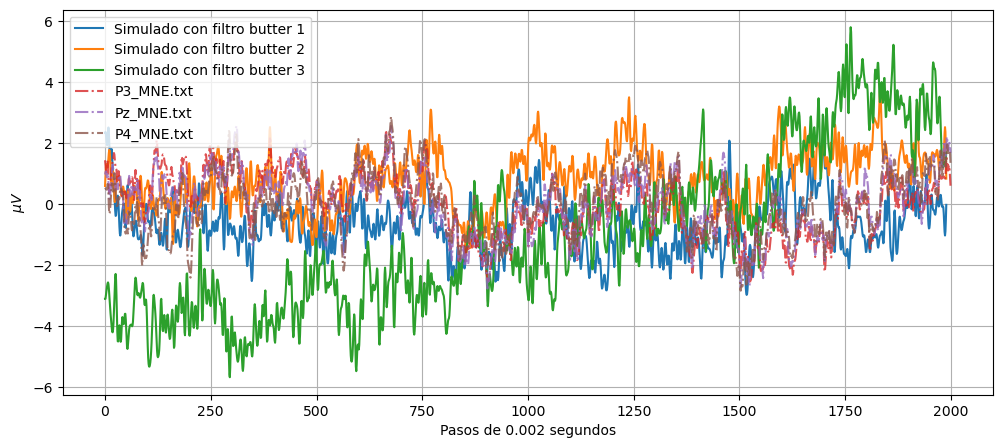

In [60]:
fig, ax = plt.subplots(figsize=[12, 5])

#ax.plot(generated_data1["data_resample"],label="Simulado")
ax.plot(generated_data1["butter"][10:],label="Simulado con filtro butter 1")
ax.plot(generated_data2["butter"][10:],label="Simulado con filtro butter 2")
ax.plot(generated_data3["butter"][10:],label="Simulado con filtro butter 3")
# # ax.plot(generated_data4["butter"][10:],label="Simulado con filtro butter 4")
# # ax.plot(generated_data5["butter"][10:],label="Simulado con filtro butter 2")

for i in range(3):
    ax.plot(reales_total_P["datos"][i],"-.", label=reales_total_P["Nombres"][i],alpha=0.8)
    #ax.plot(reales_total_C["datos"][i],"-.", label=reales_total_C["Nombres"][i],alpha=0.8)
# for i in range(7):
#     ax.plot(reales_total_F["datos"][i],"-.", label=reales_total_F["Nombres"][i],alpha=0.8)


plt.xlabel("Pasos de 0.002 segundos")
plt.ylabel(r"$\mu V$")
plt.legend()  # Esto añade una leyenda para identificar cada línea
plt.grid()
plt.show()  # Mostrar todos los gráficos en la misma figura


NameError: name 'reales_total_C' is not defined

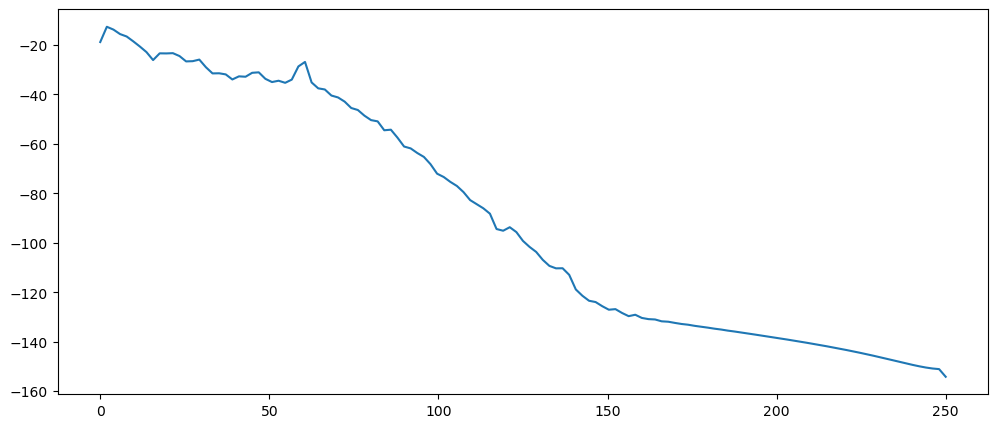

In [7]:
fig, ax = plt.subplots(figsize=[12, 5])


#ax.plot(generated_data1["frequencies"],generated_data1["welch_data"],label="Simulacion 1")
# ax.plot(generated_data2["frequencies"],generated_data2["welch_data"],label="Simulacion 2")
# ax.plot(generated_data3["frequencies"],generated_data3["welch_data"],label="Simulacion 3")
# ax.plot(generated_data4["frequencies"],generated_data4["welch_data"],label="Simulacion 4")

for i in range(3):
    ax.plot(reales_total_P["frequencies"][i],reales_total_P["welch_data"][i], label=reales_total_P["Nombres"][i])
    ax.plot(reales_total_C["frequencies"][i],reales_total_C["welch_data"][i], label=reales_total_C["Nombres"][i],linestyle="--")
for i in range(7):
    ax.plot(reales_total_F["frequencies"][i],reales_total_F["welch_data"][i], label=reales_total_F["Nombres"][i],linestyle="-.")

plt.xlabel("Frecuencia")
plt.ylabel("psd dB ")
plt.grid()
plt.xlim(0,60)
plt.legend()  # Esto añade una leyenda para identificar cada línea
plt.show()  # Mostrar todos los gráficos en la misma figura
